# Liveness-Tracking Results

Here are the results for the liveness tests.

## 1. Imports

Import the libraries to process the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from math import prod
import os

## 2. Read Data

Read in the data for each test result.

In [2]:
# The data is stored in a 5XX.csv for the serial tests, and 6XX.csv for the parallel tests
# The data files are in the `/data` folder

# Check if the data is loaded
# If not, load it
if 'all_data' in locals():
    print("Data already loaded")
else:
    # A structure for storing the data
    all_data = {}

    for i in range(500, 600):
        if os.path.isfile("../data/generational-test/" + str(i) + ".csv"):
            all_data[i] = pd.read_csv("../data/generational-test/" + str(i) + ".csv")
            print("Loaded data for test " + str(i))

Loaded data for test 502
Loaded data for test 505
Loaded data for test 507
Loaded data for test 508
Loaded data for test 511
Loaded data for test 521
Loaded data for test 525
Loaded data for test 538


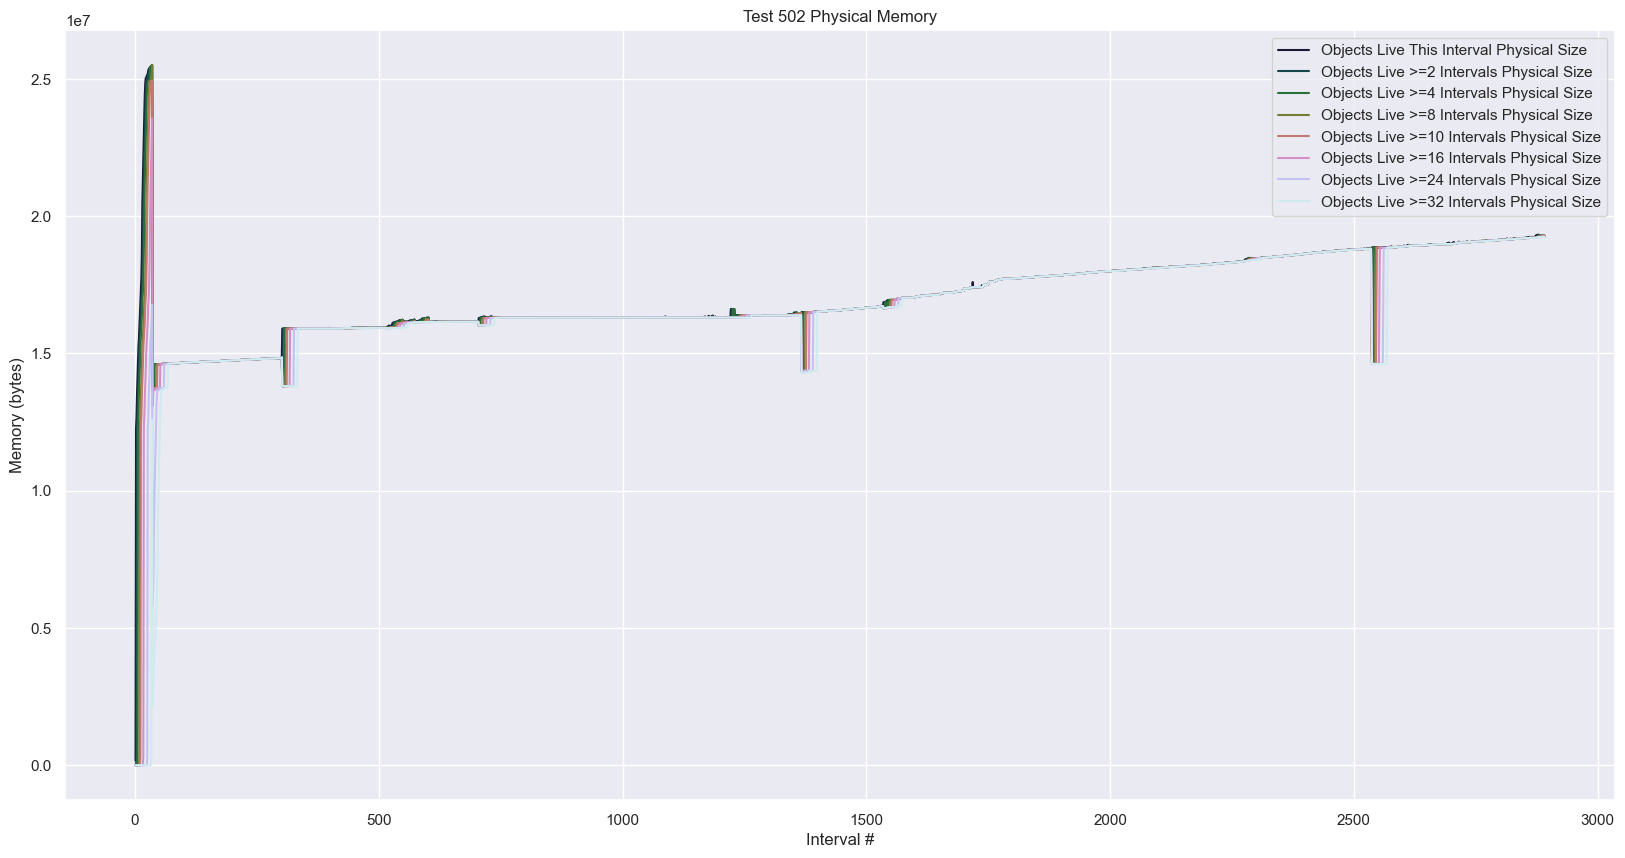

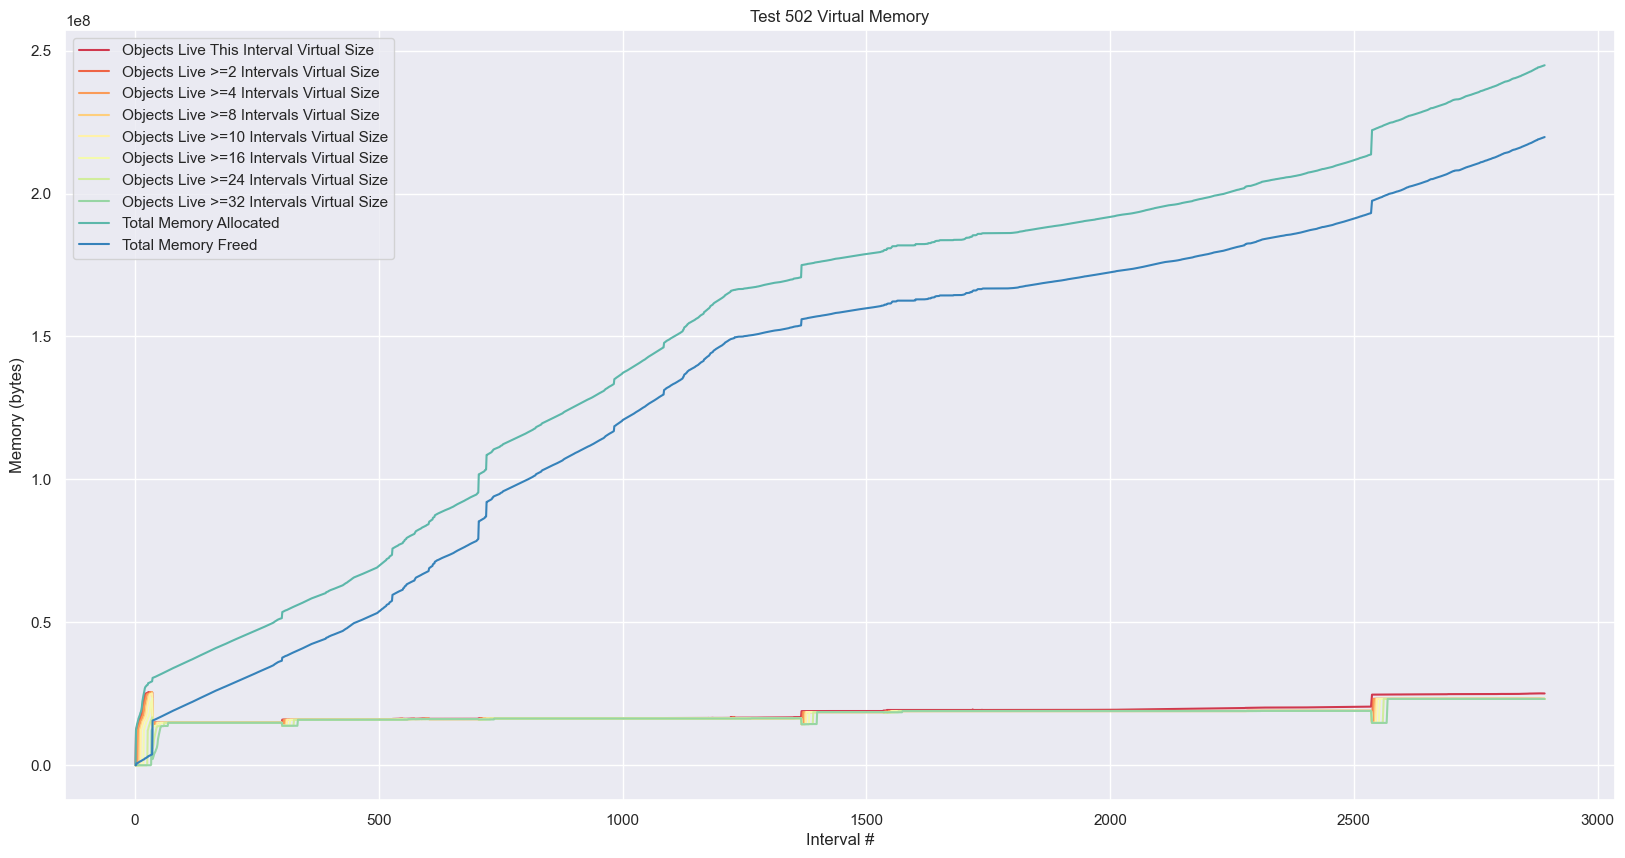

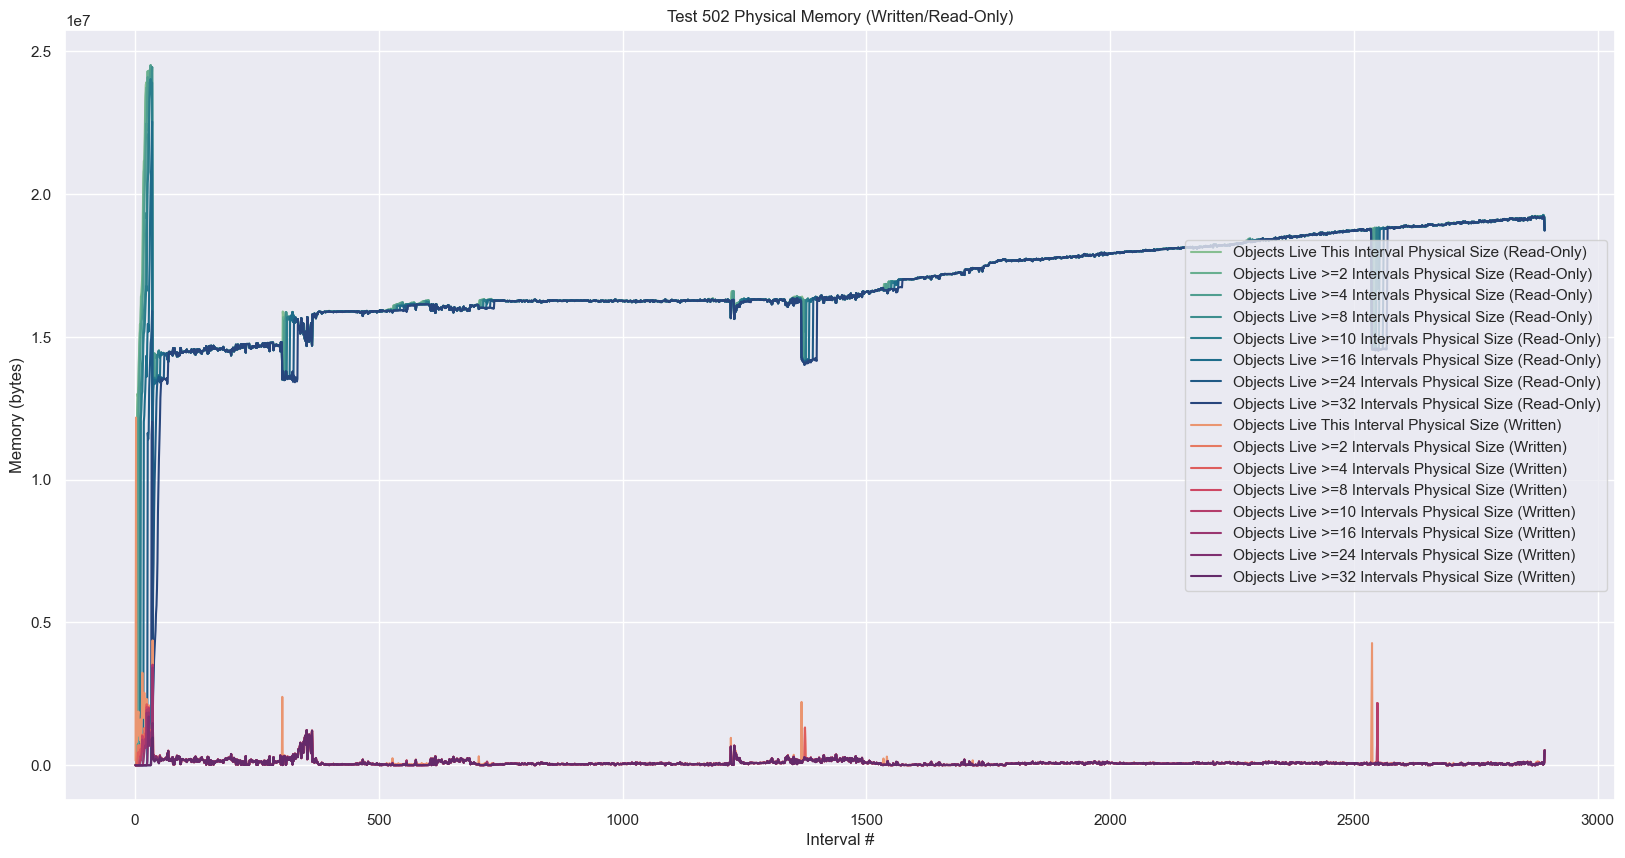

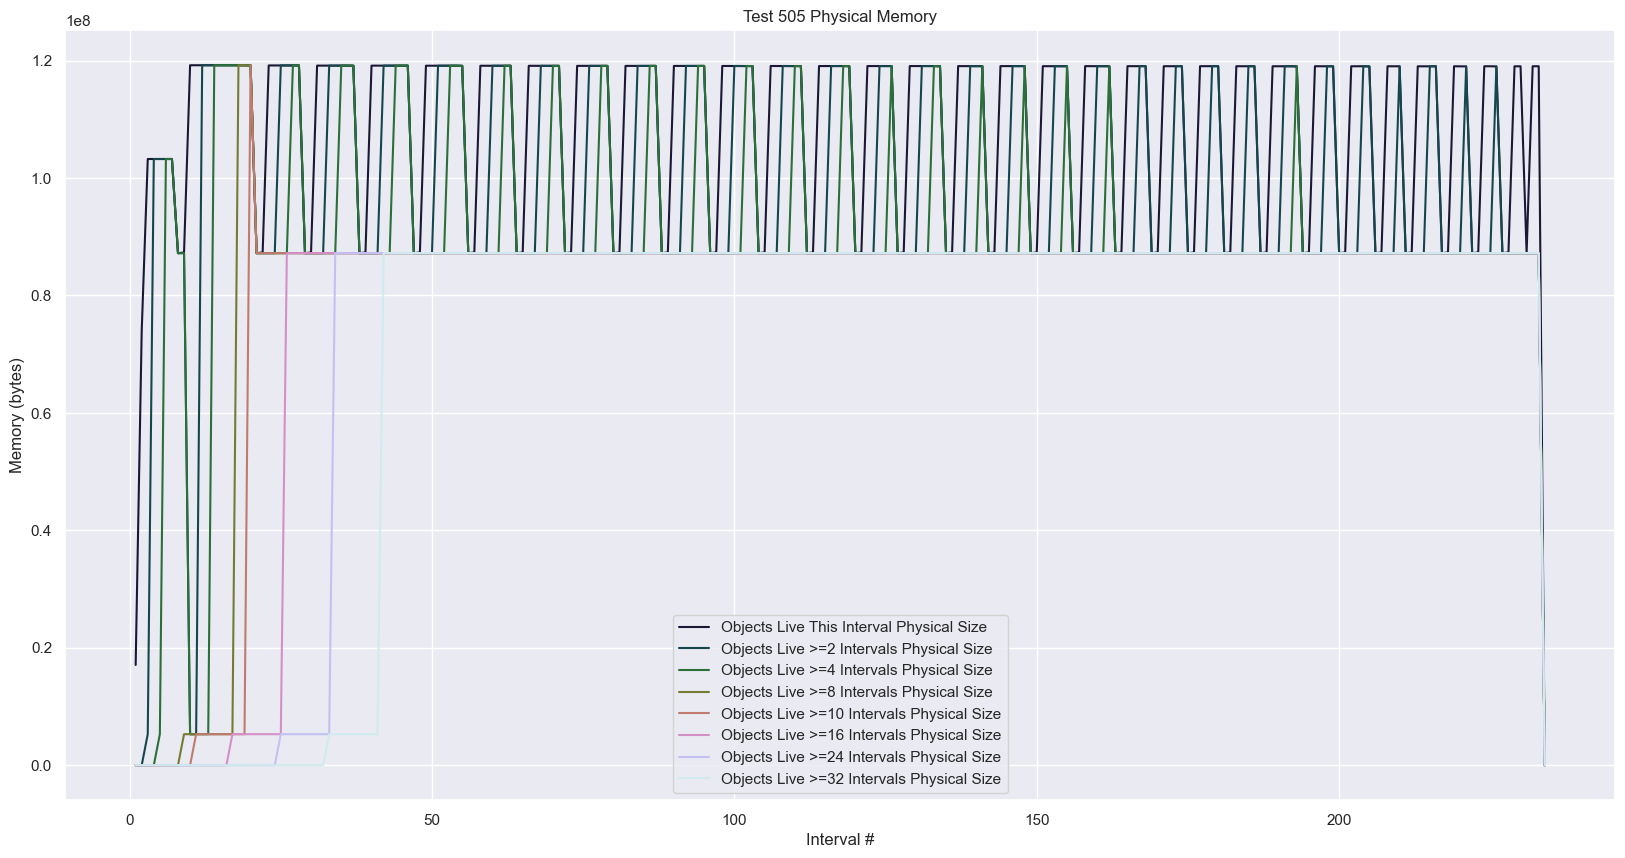

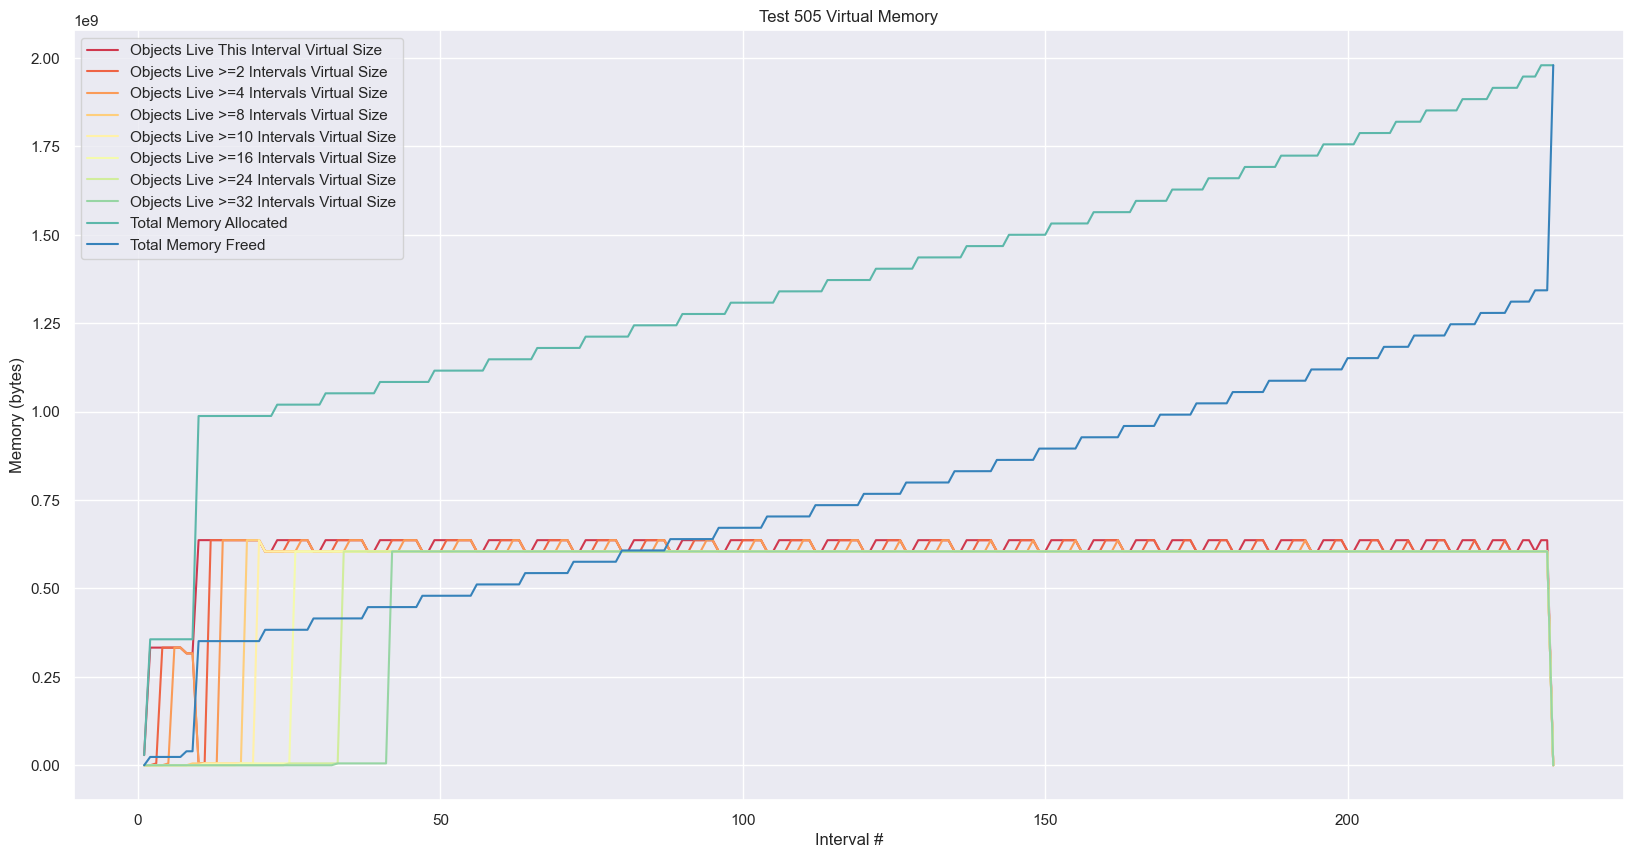

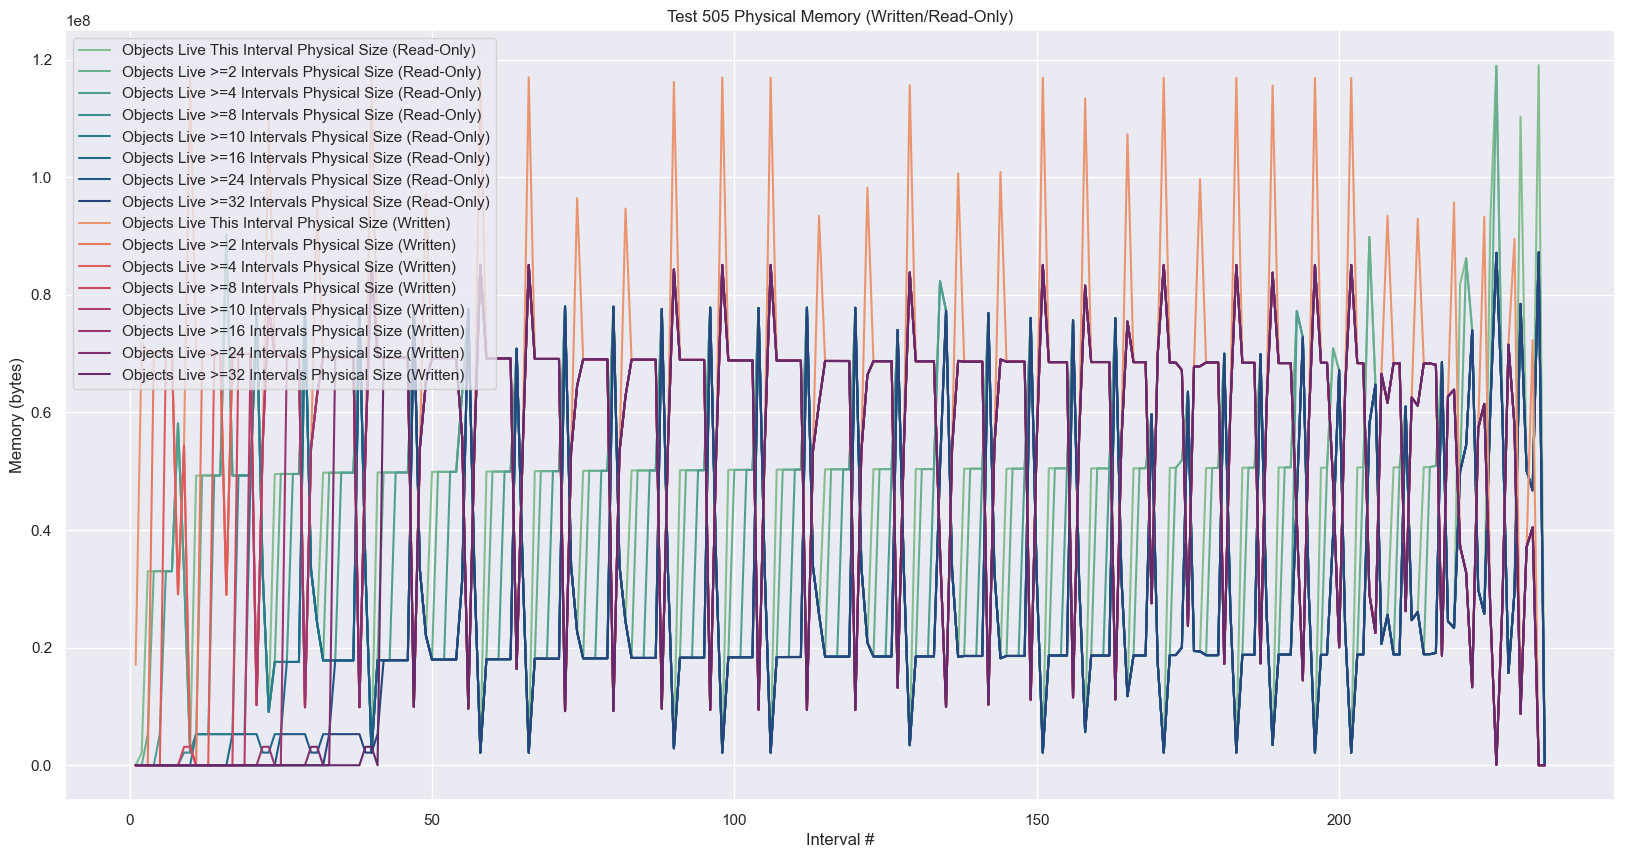

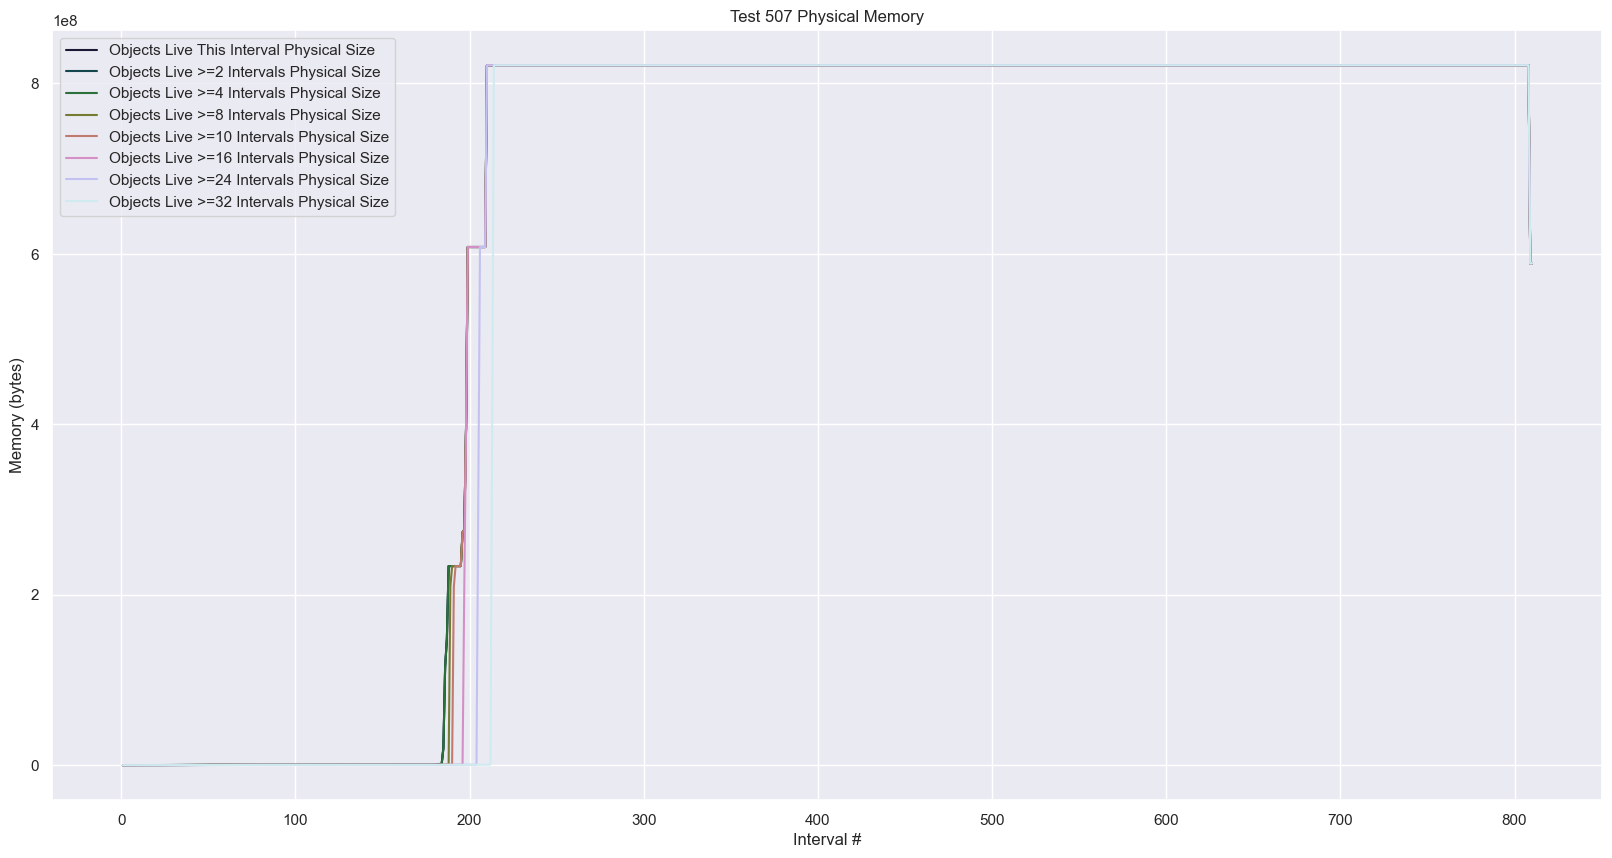

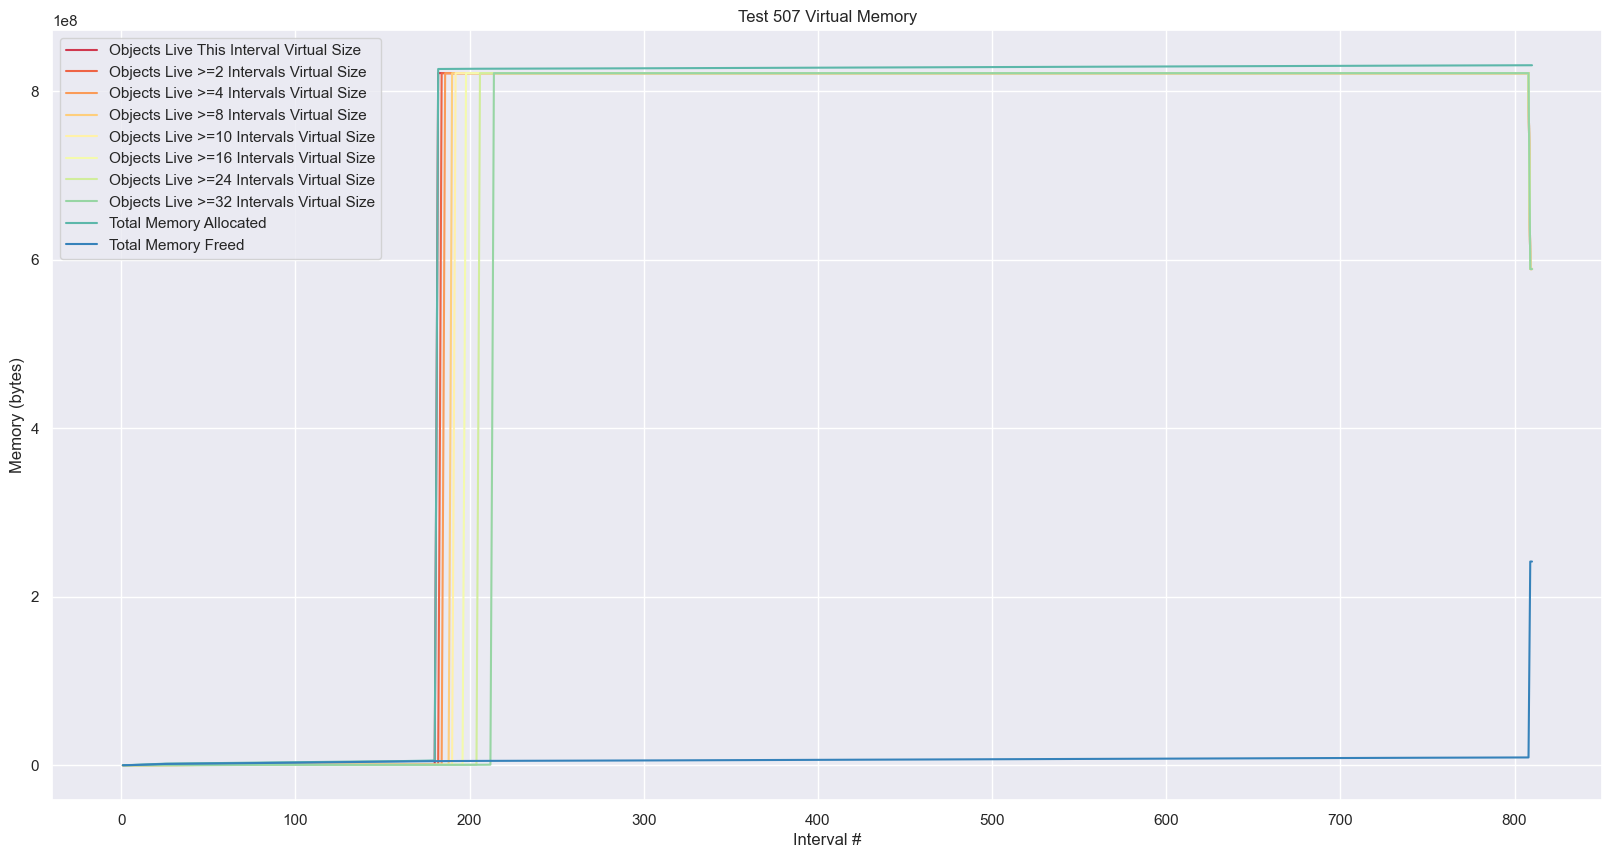

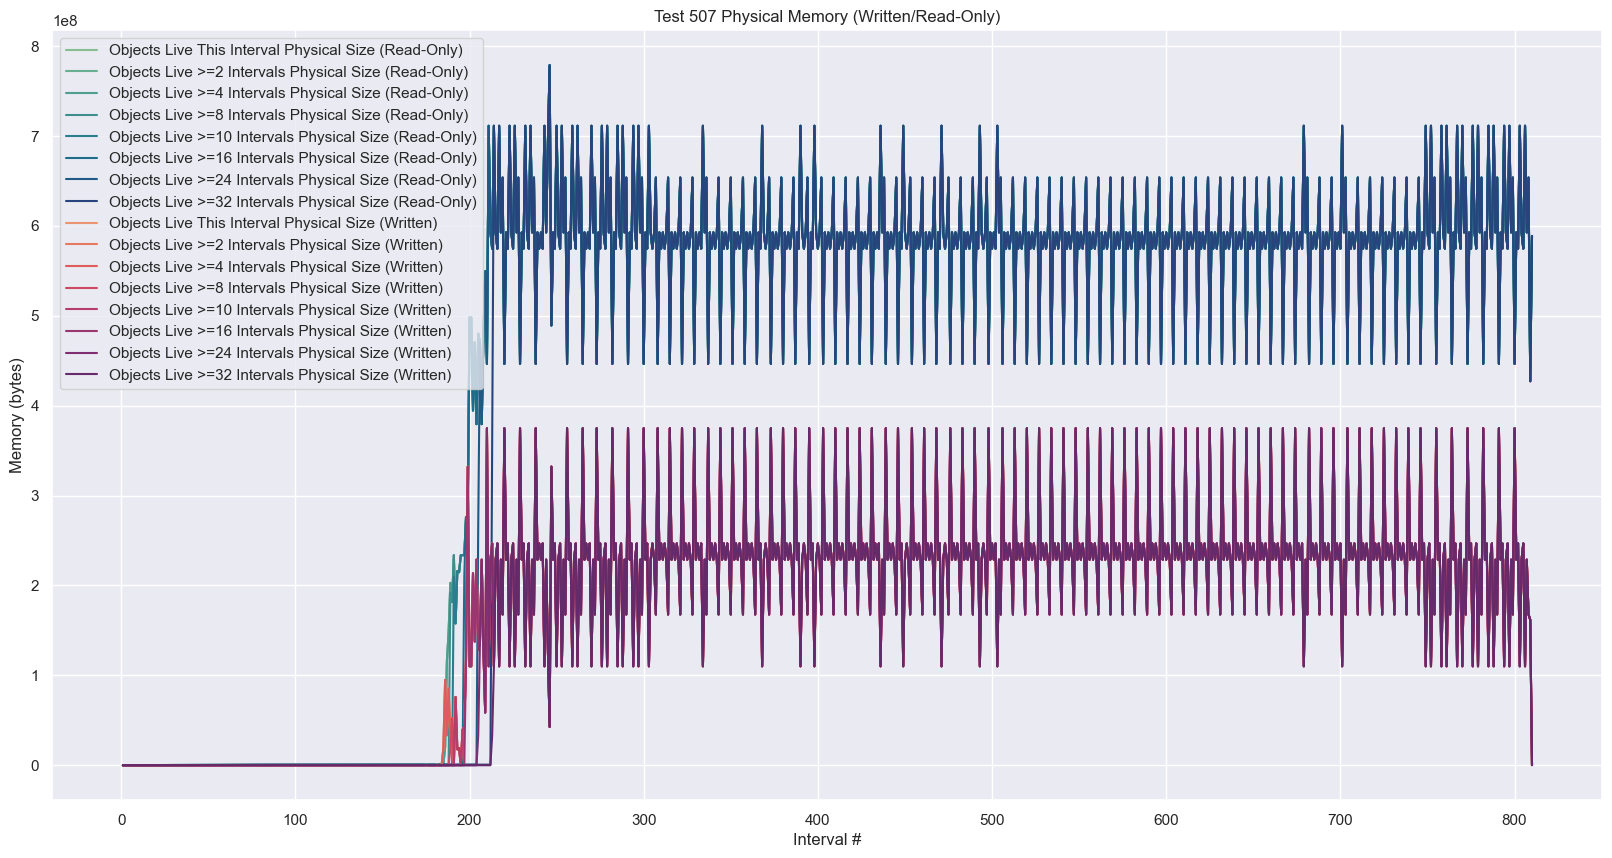

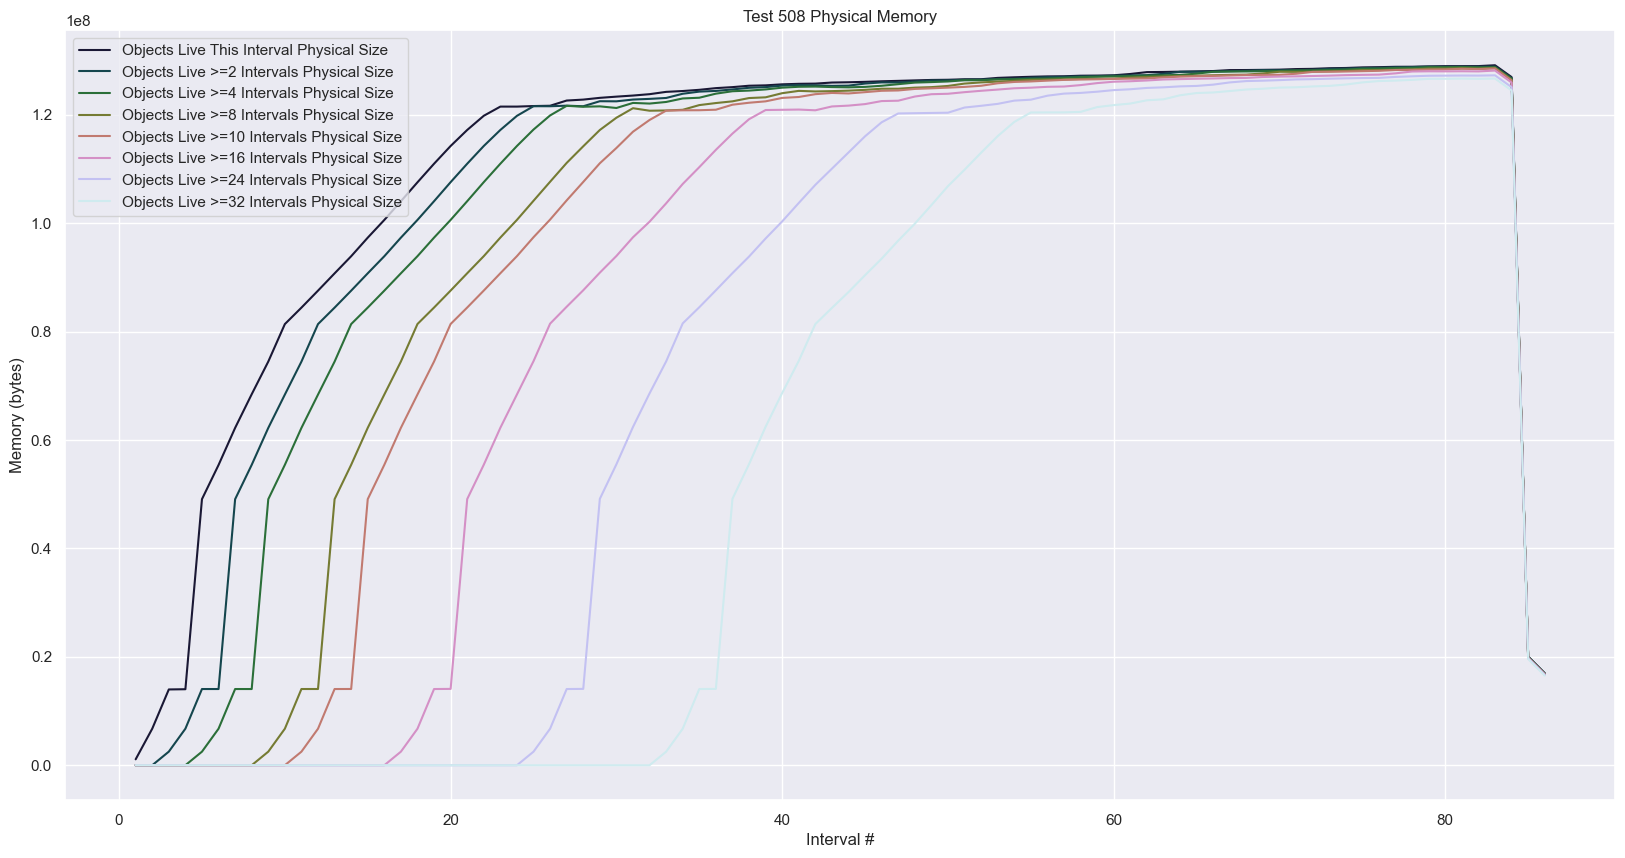

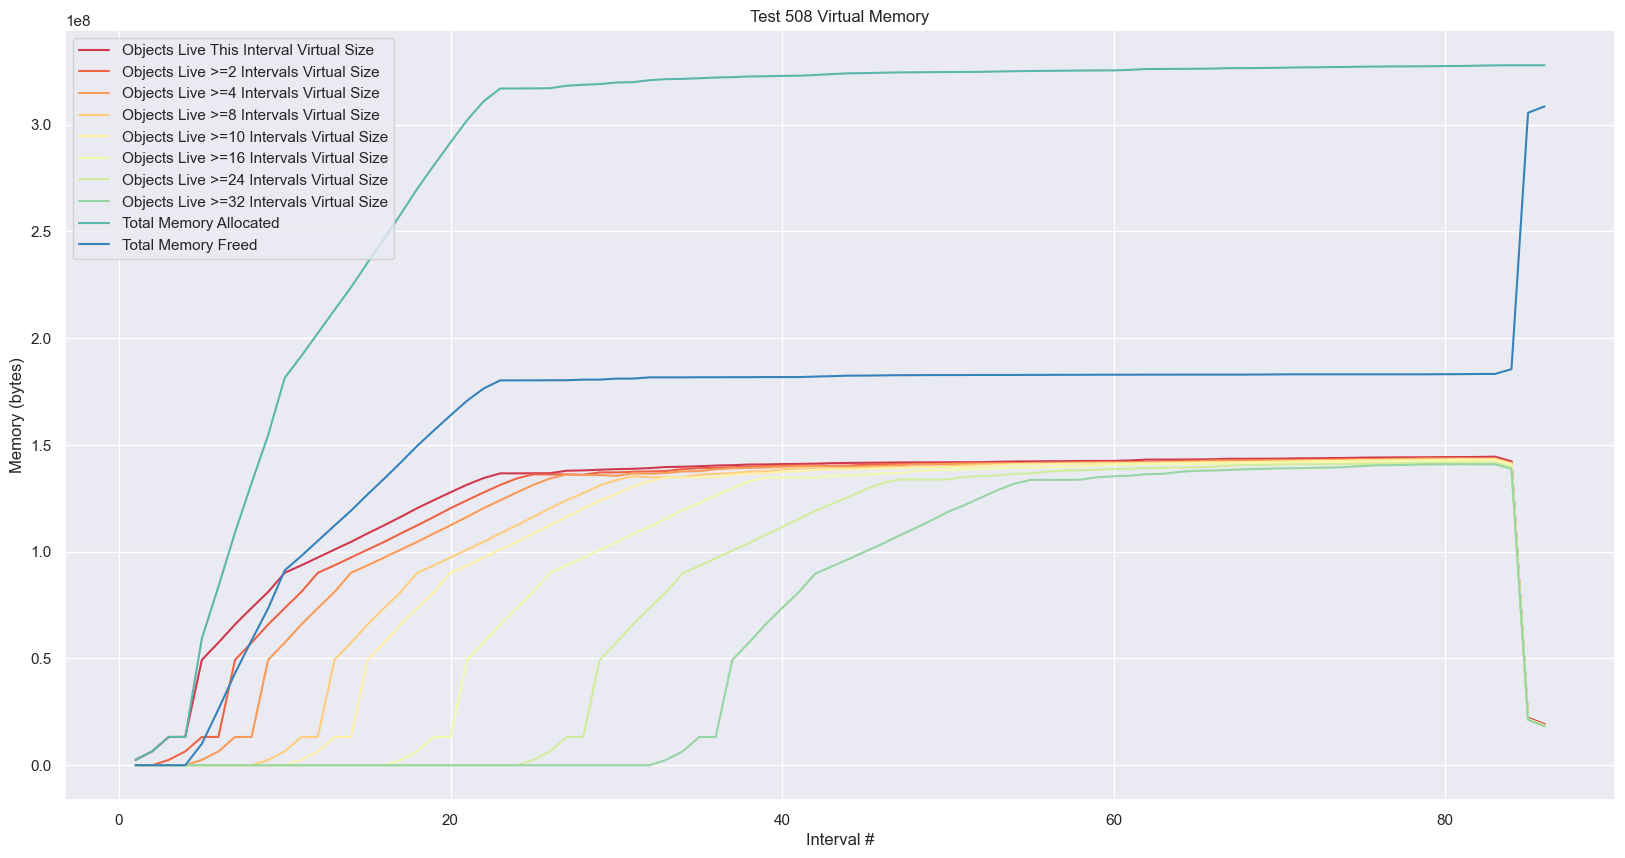

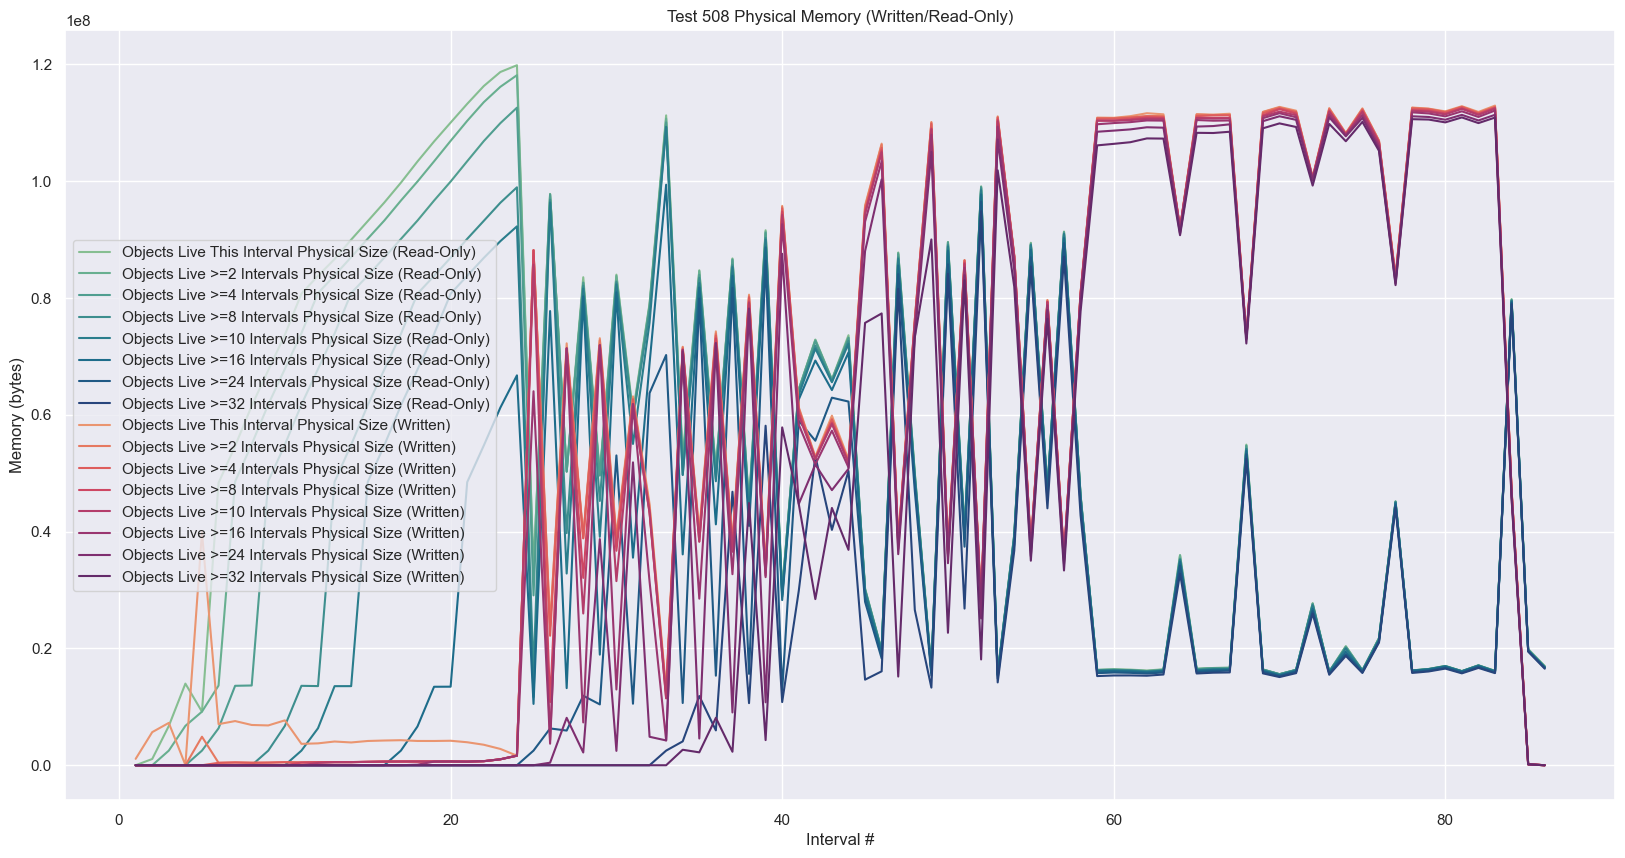

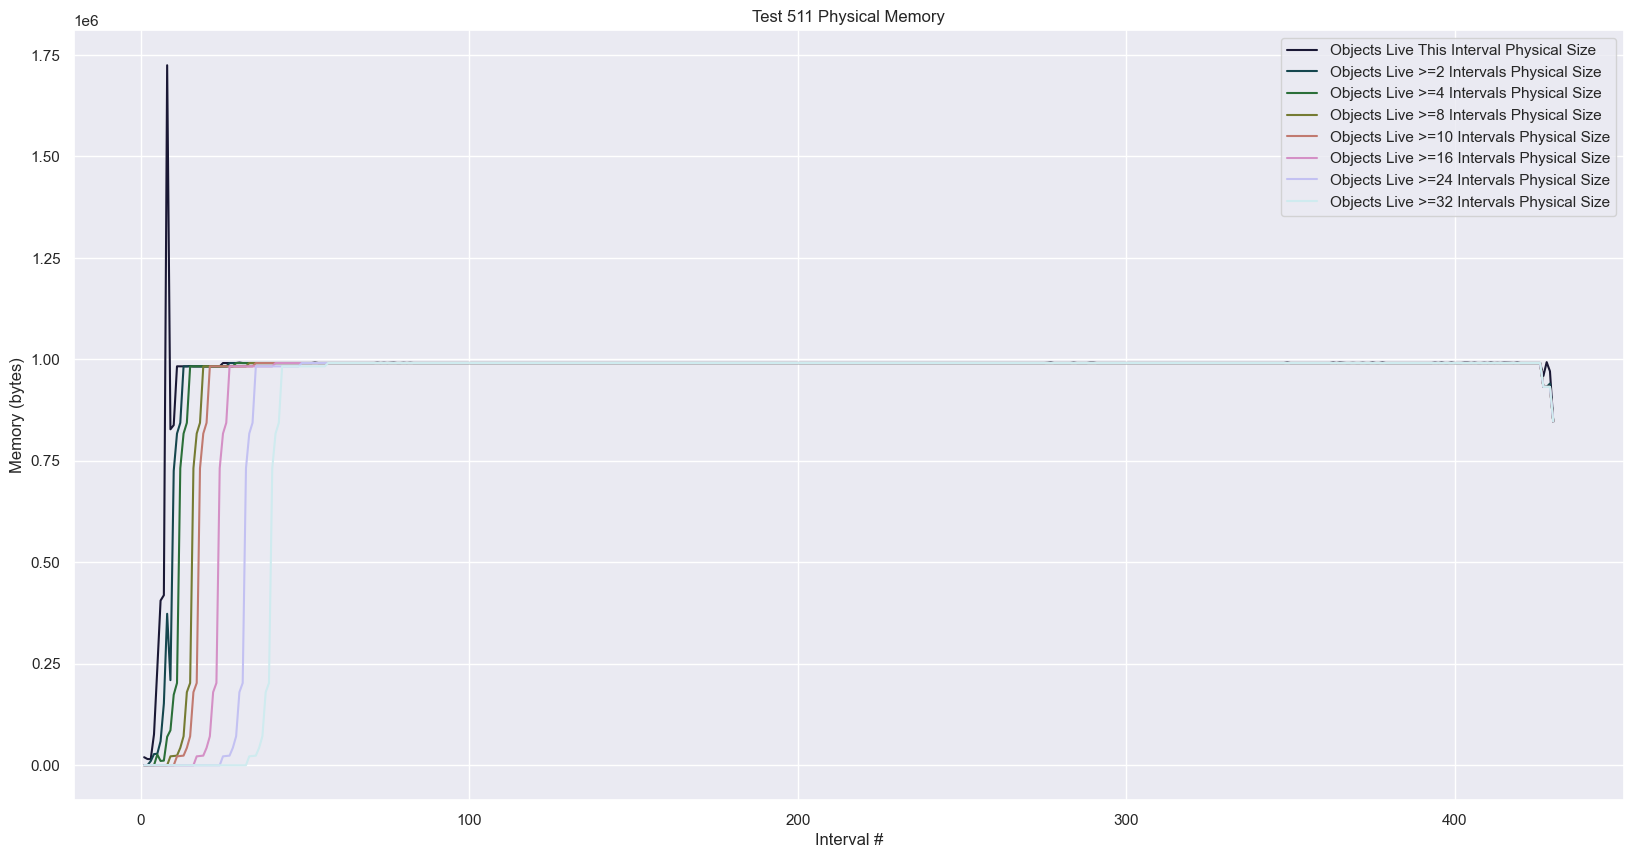

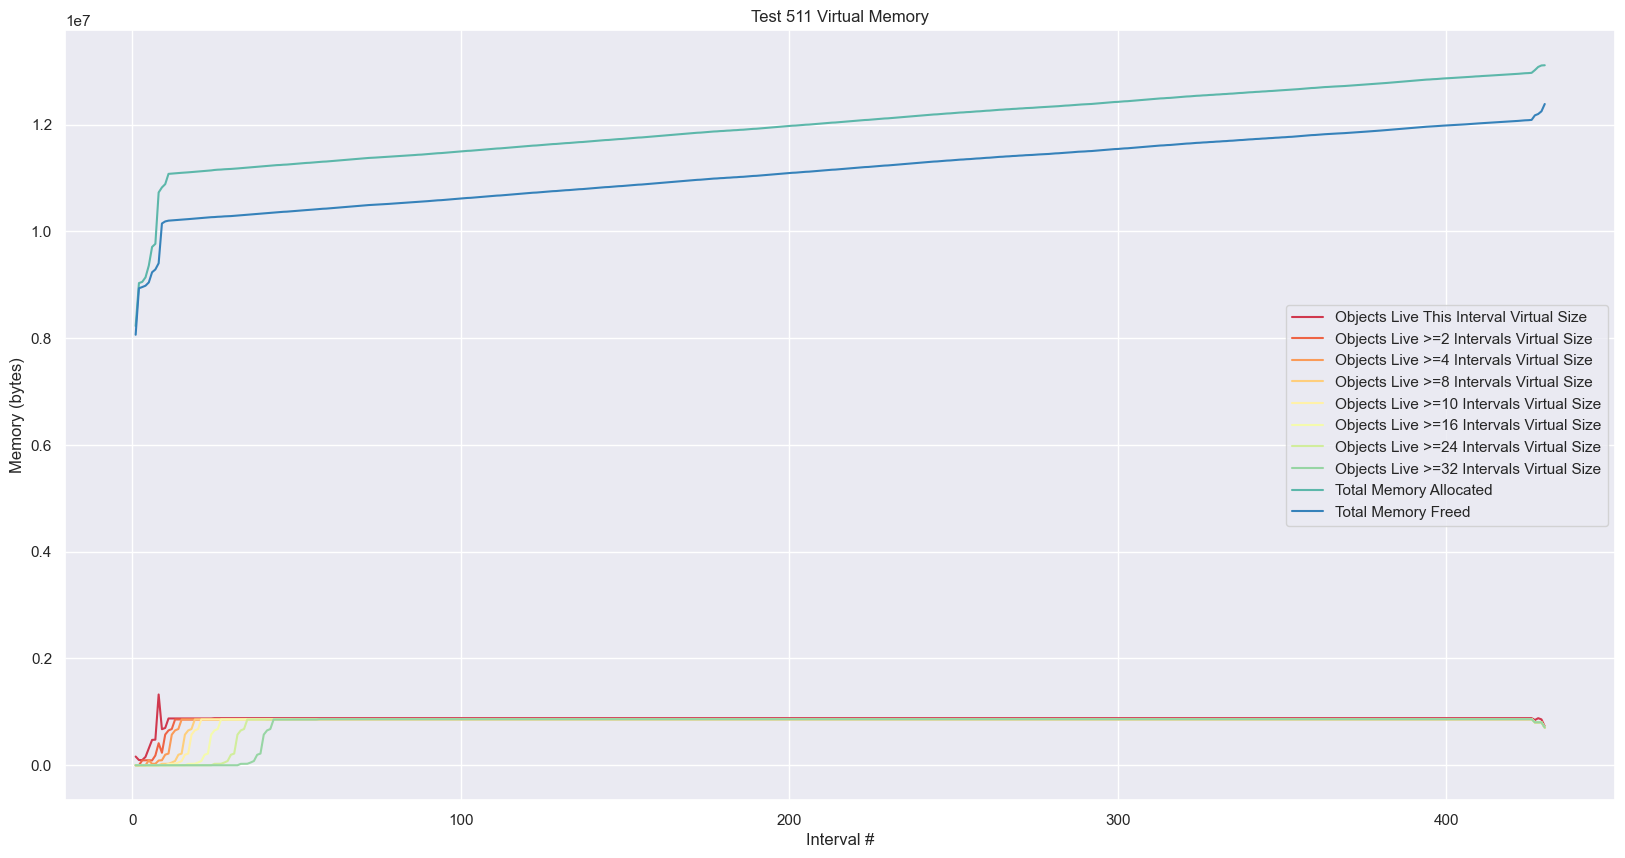

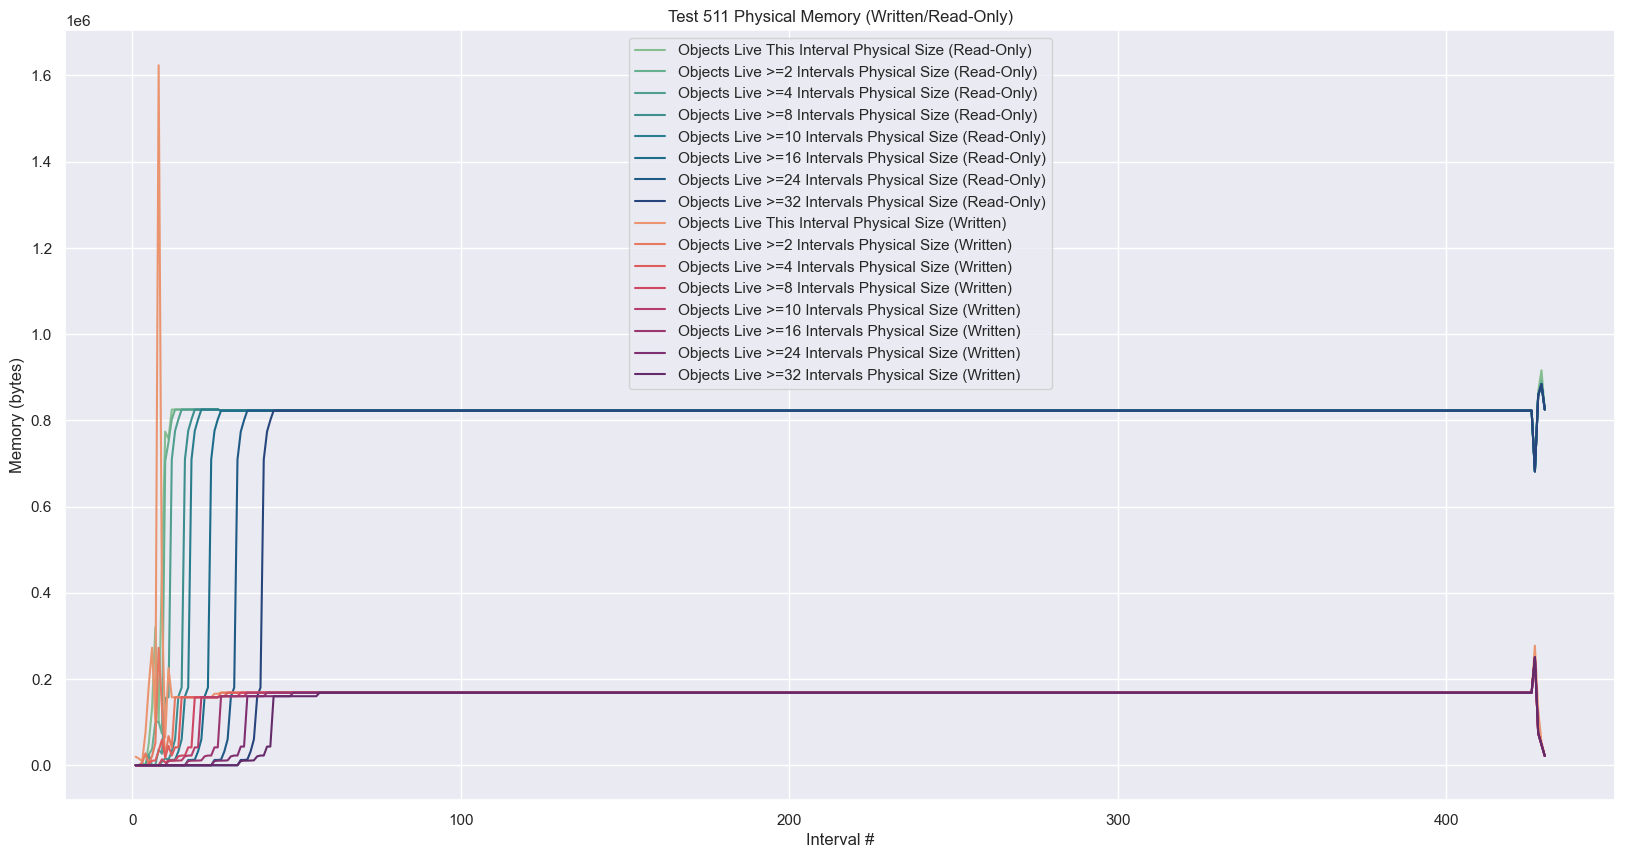

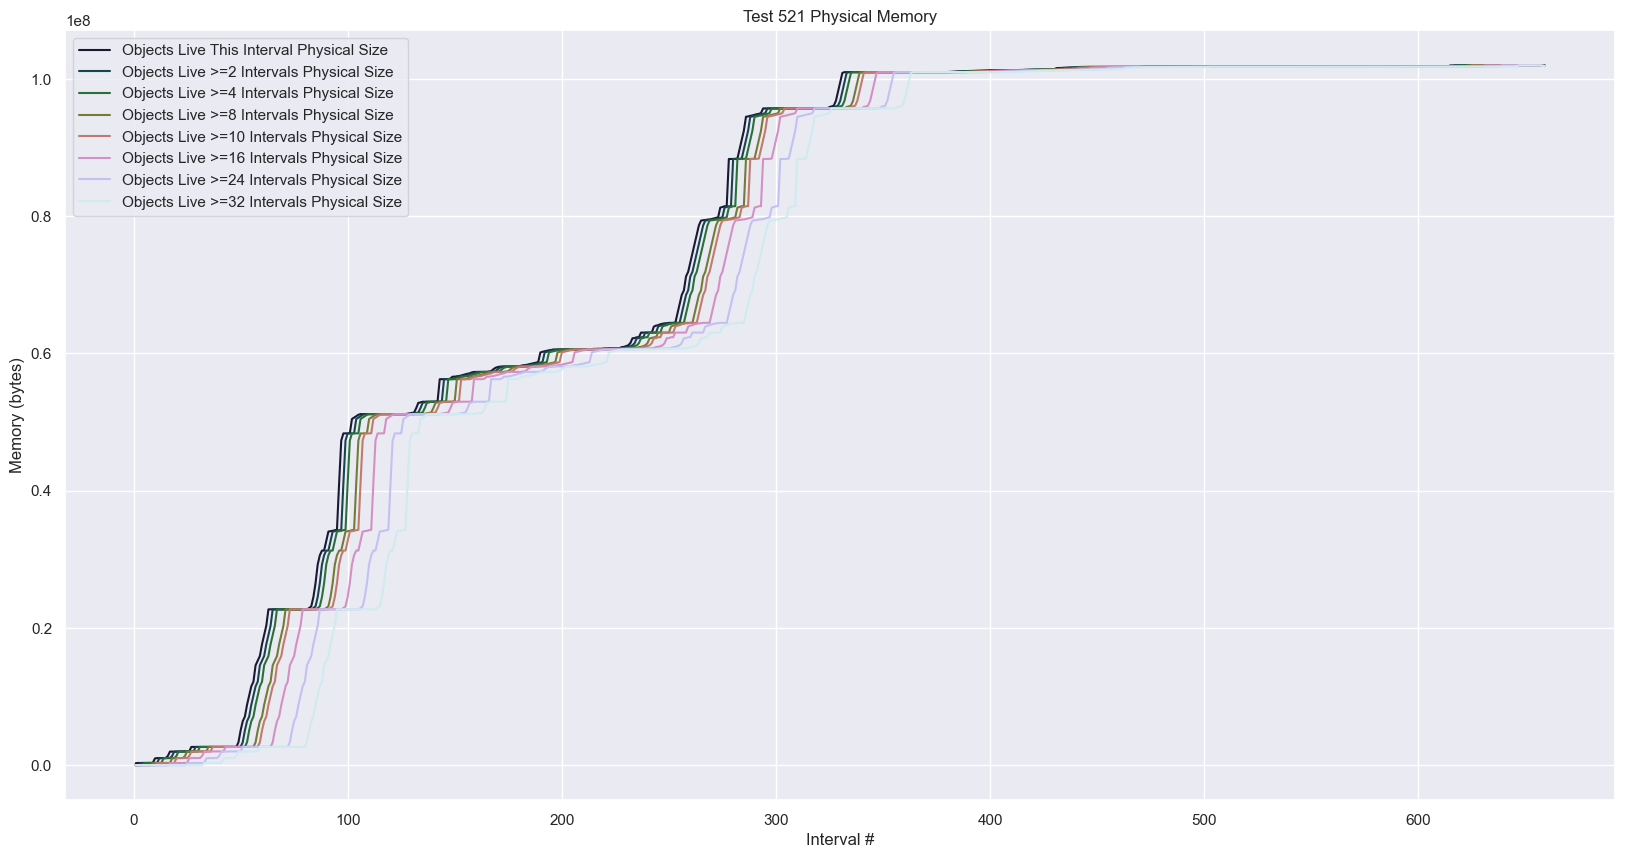

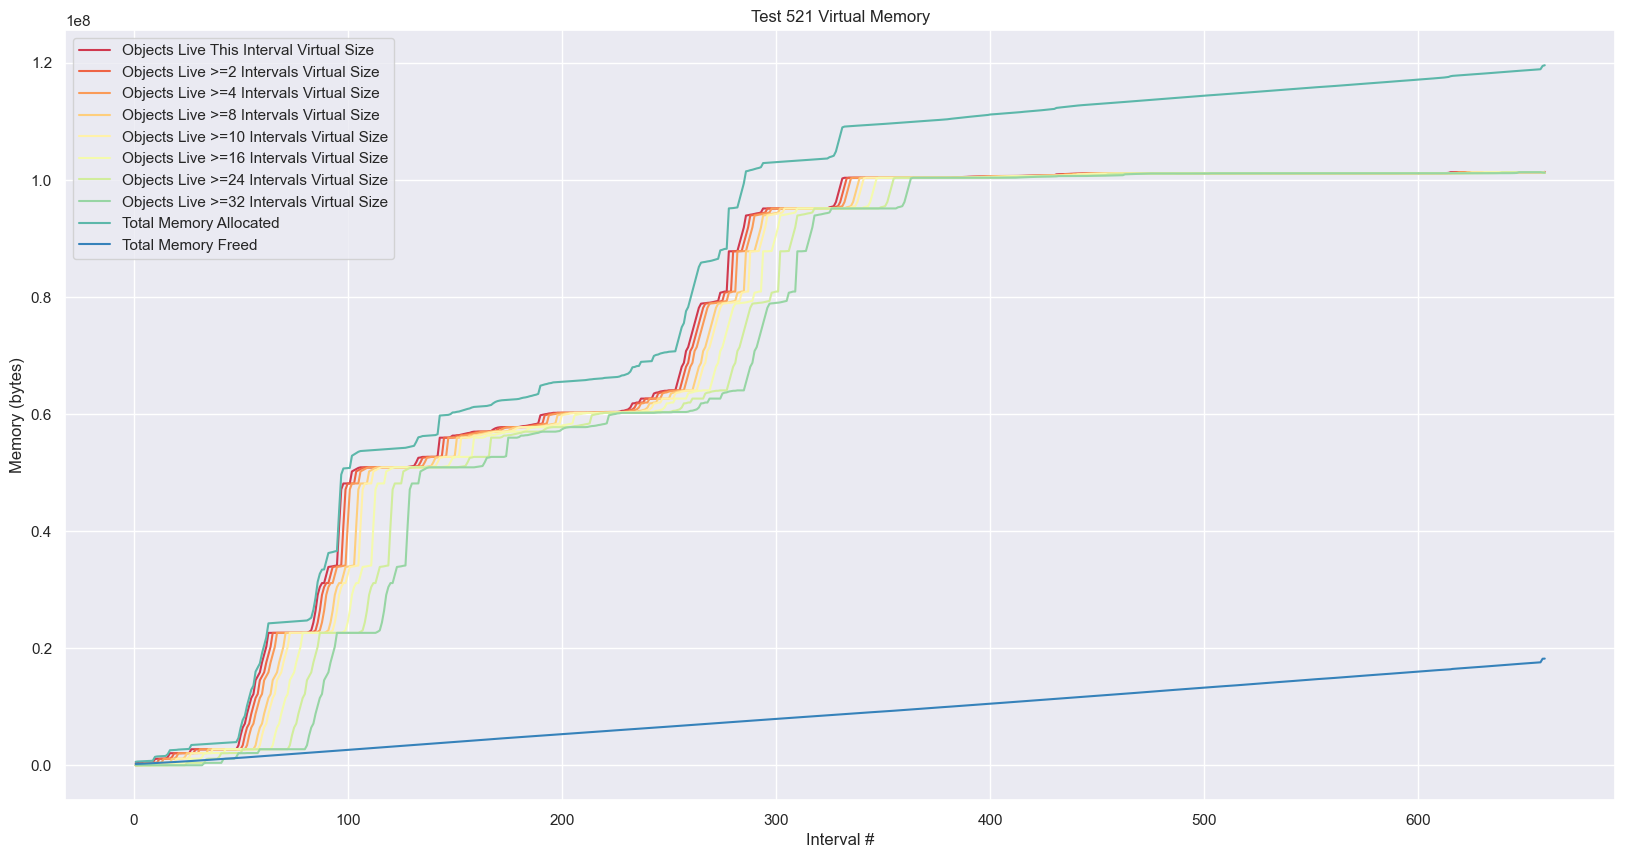

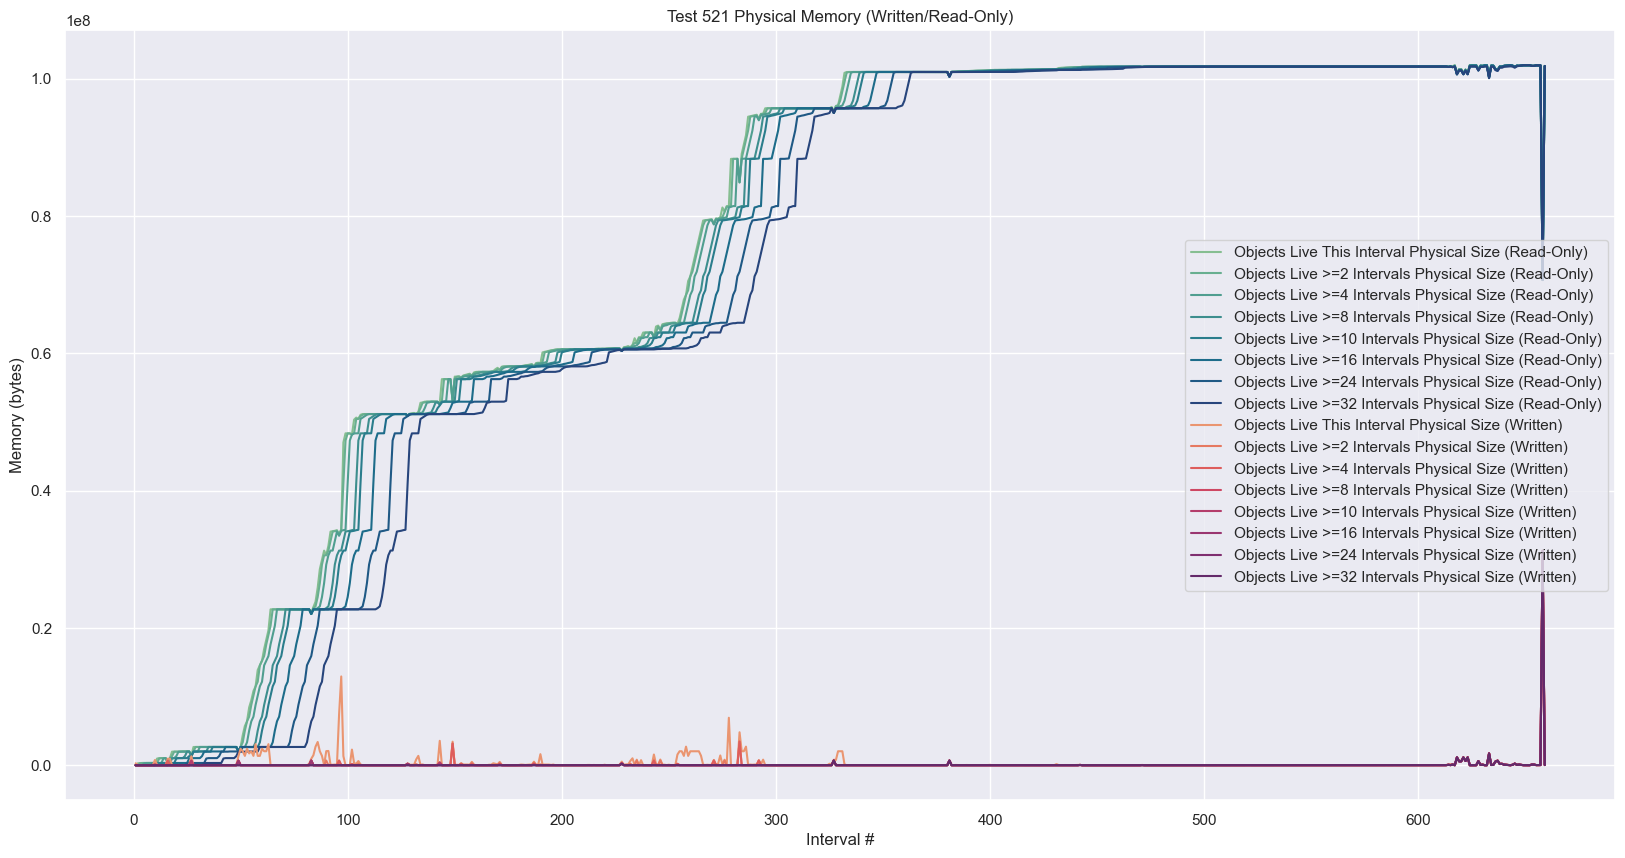

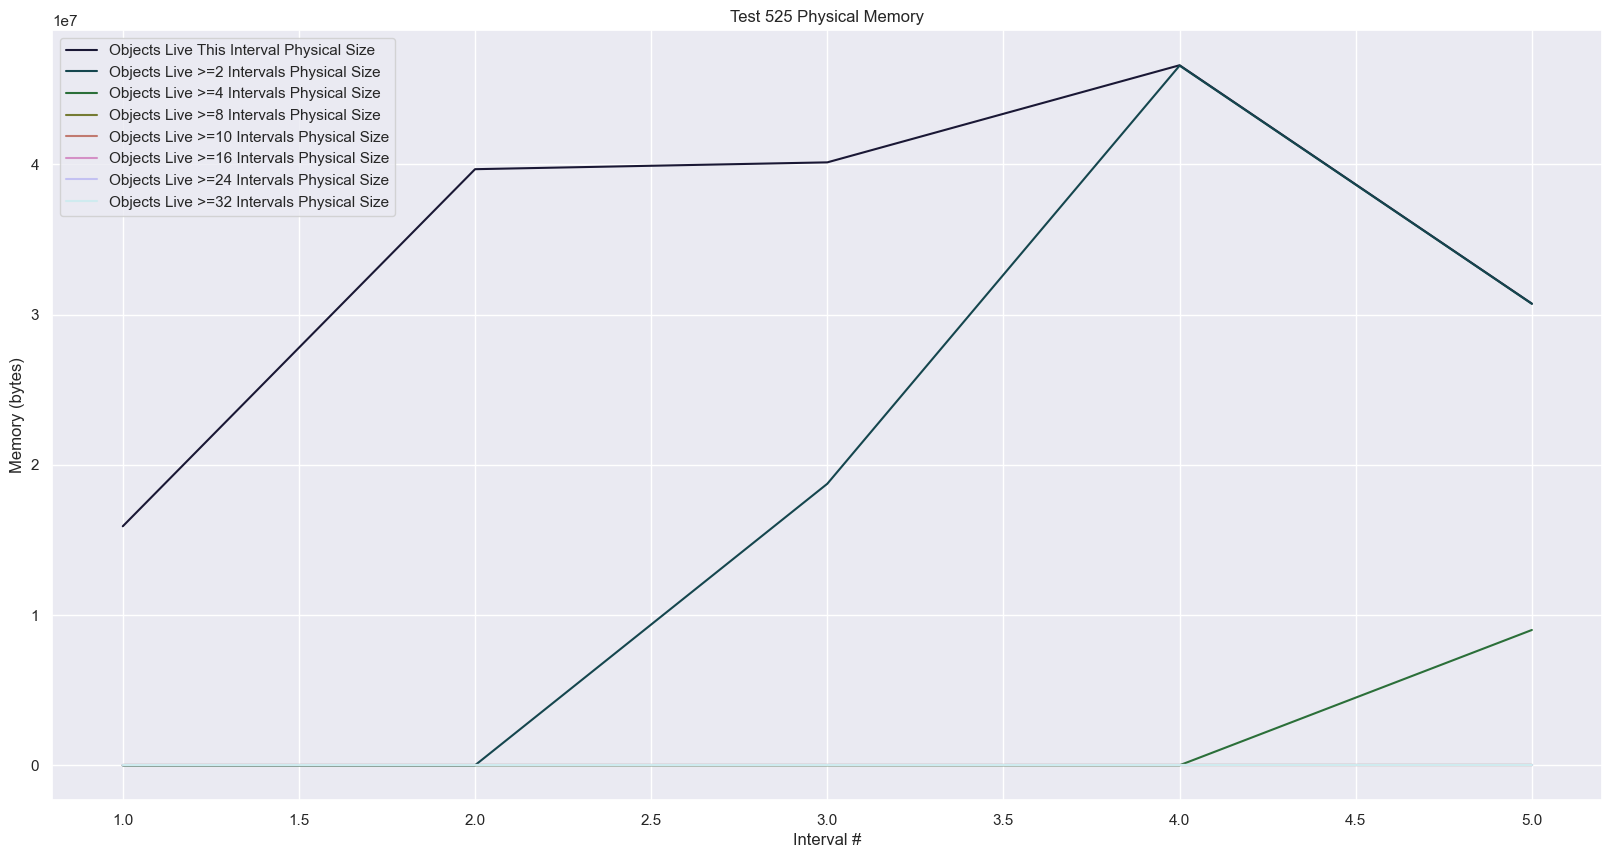

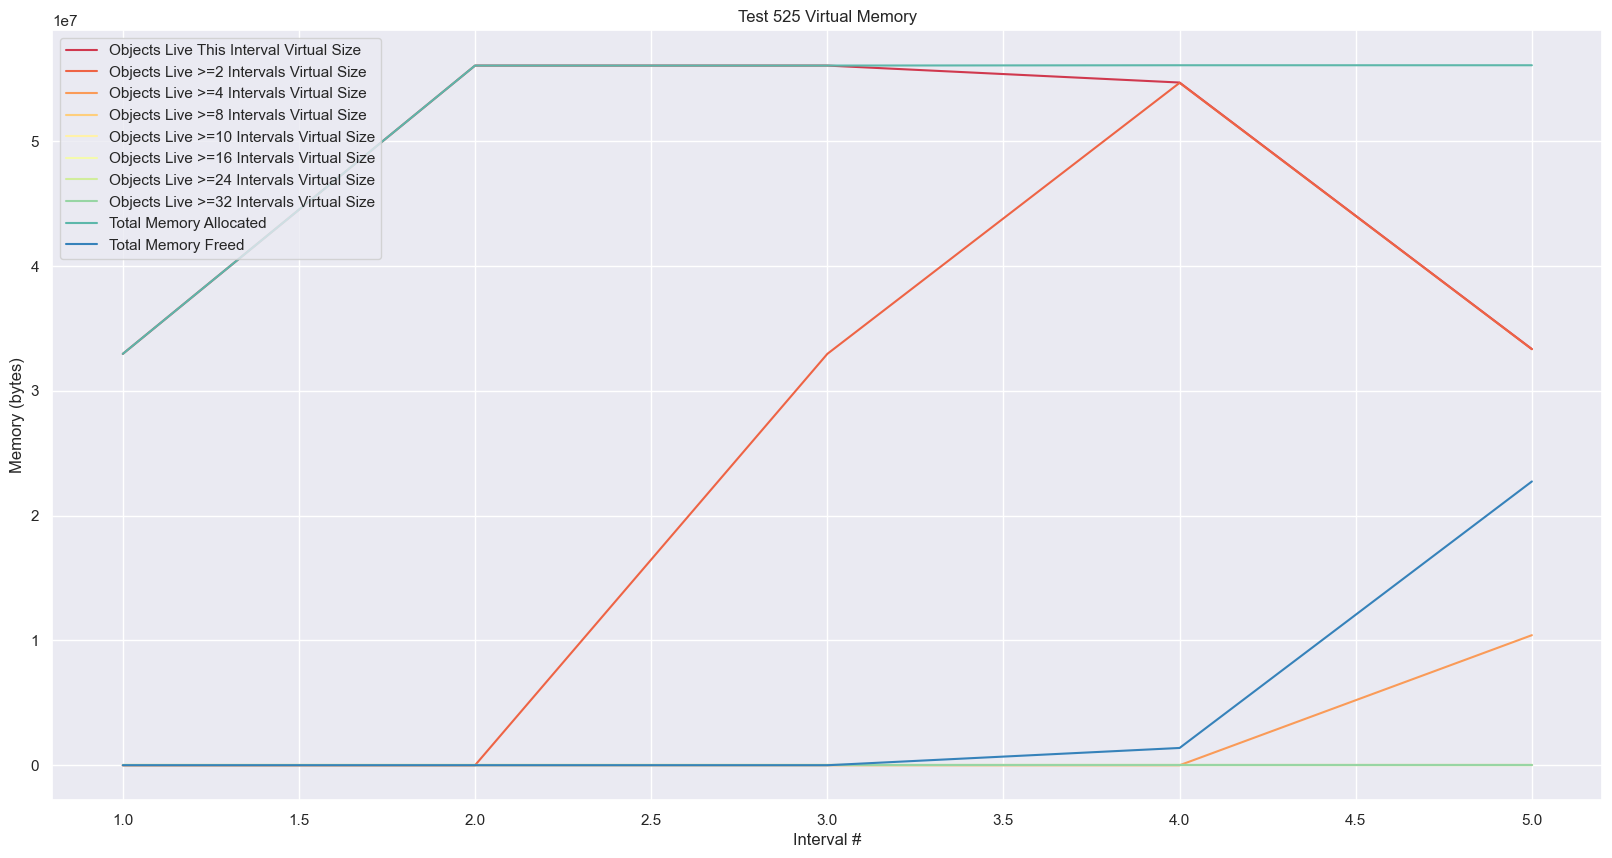

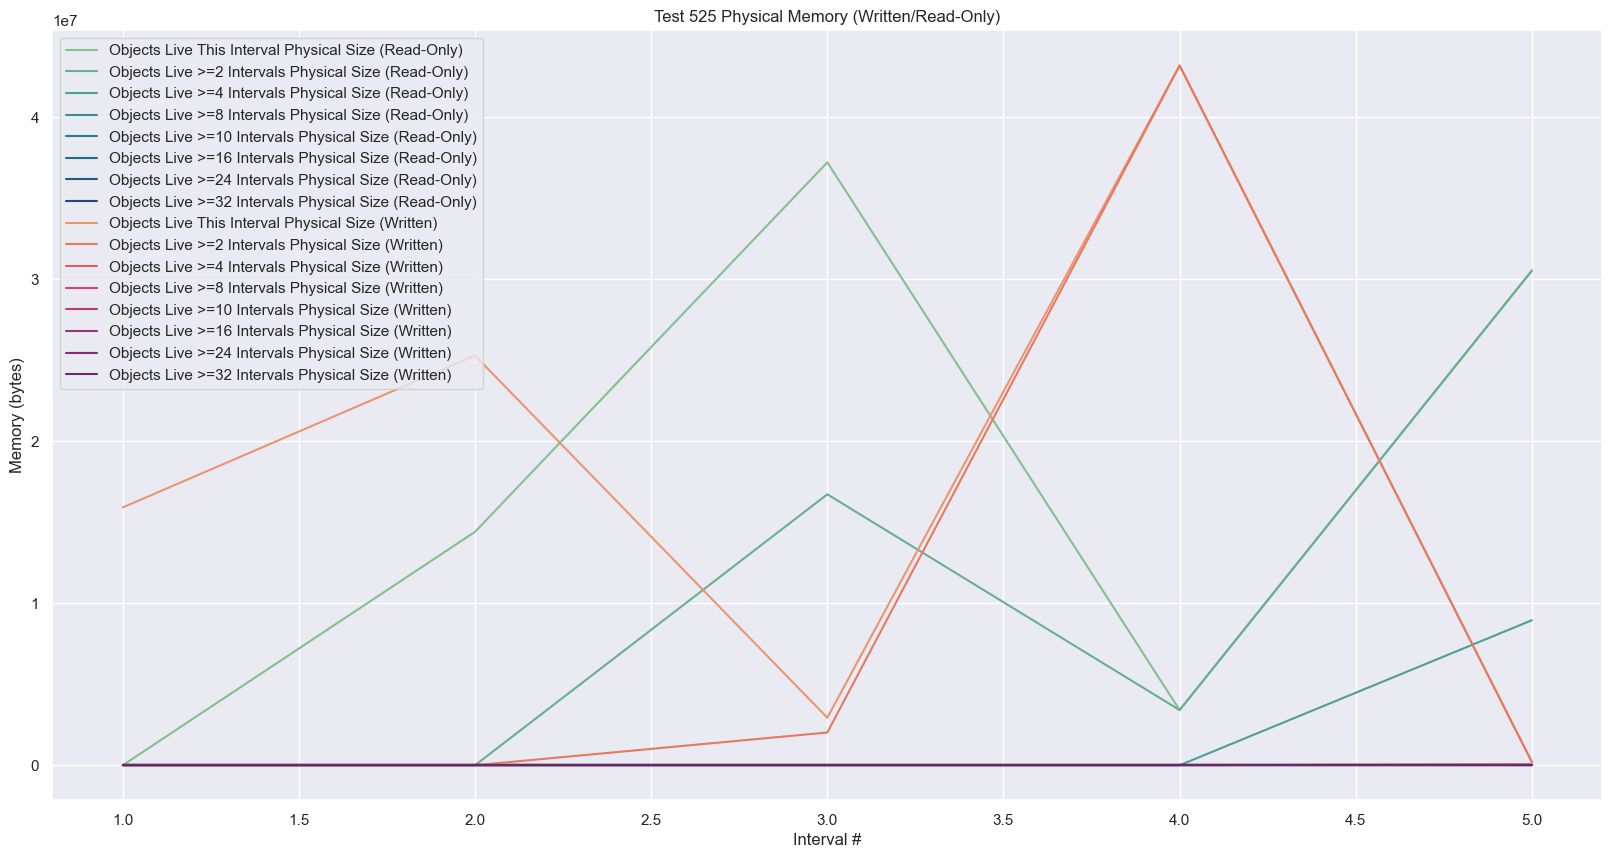

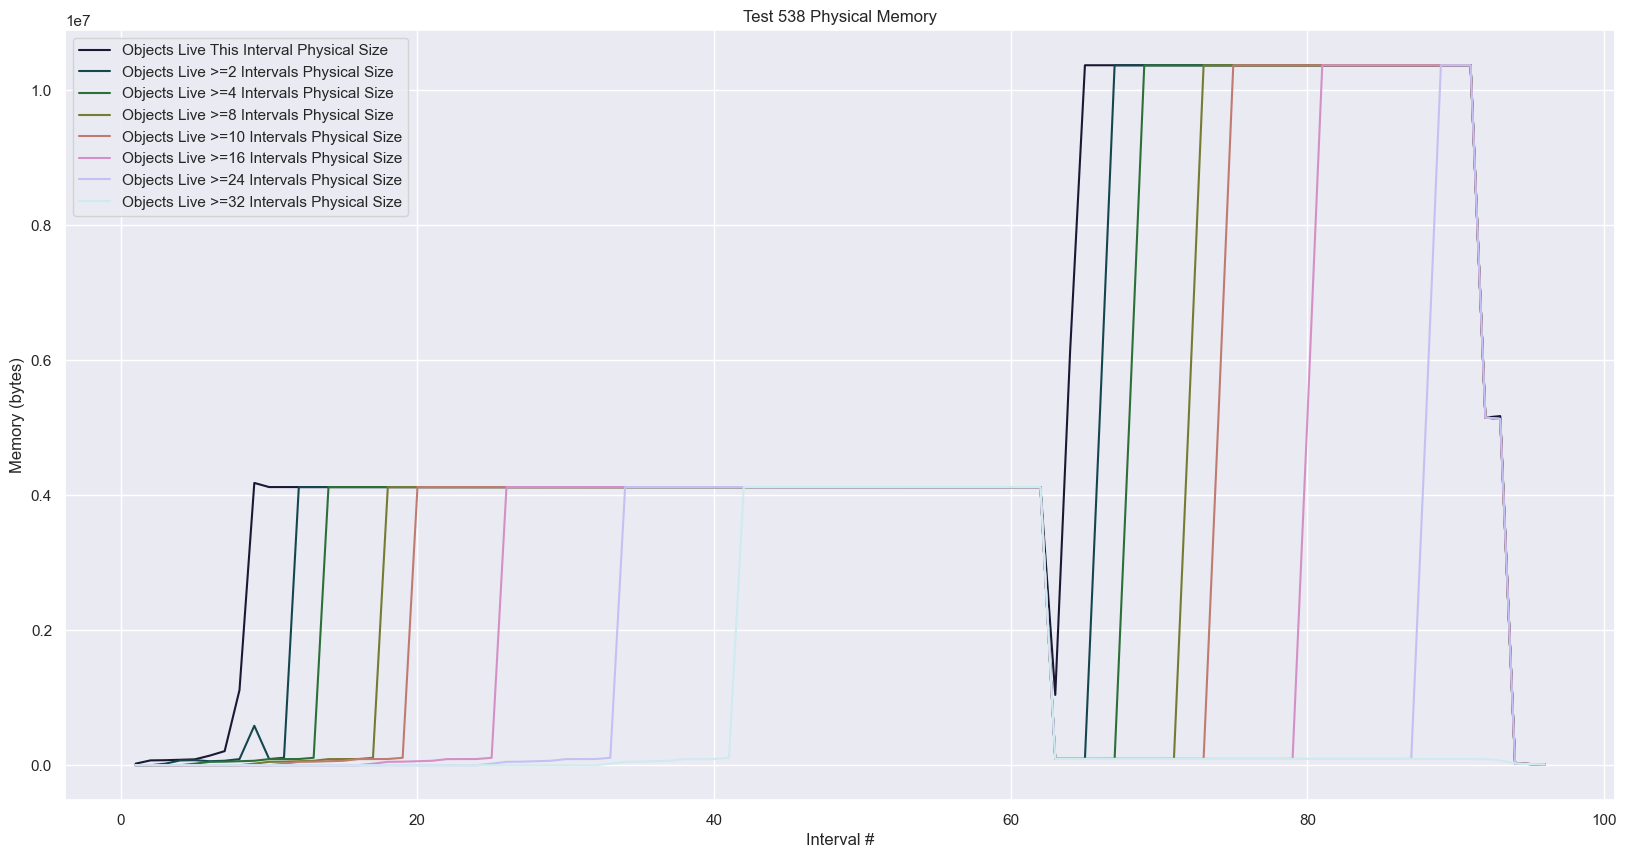

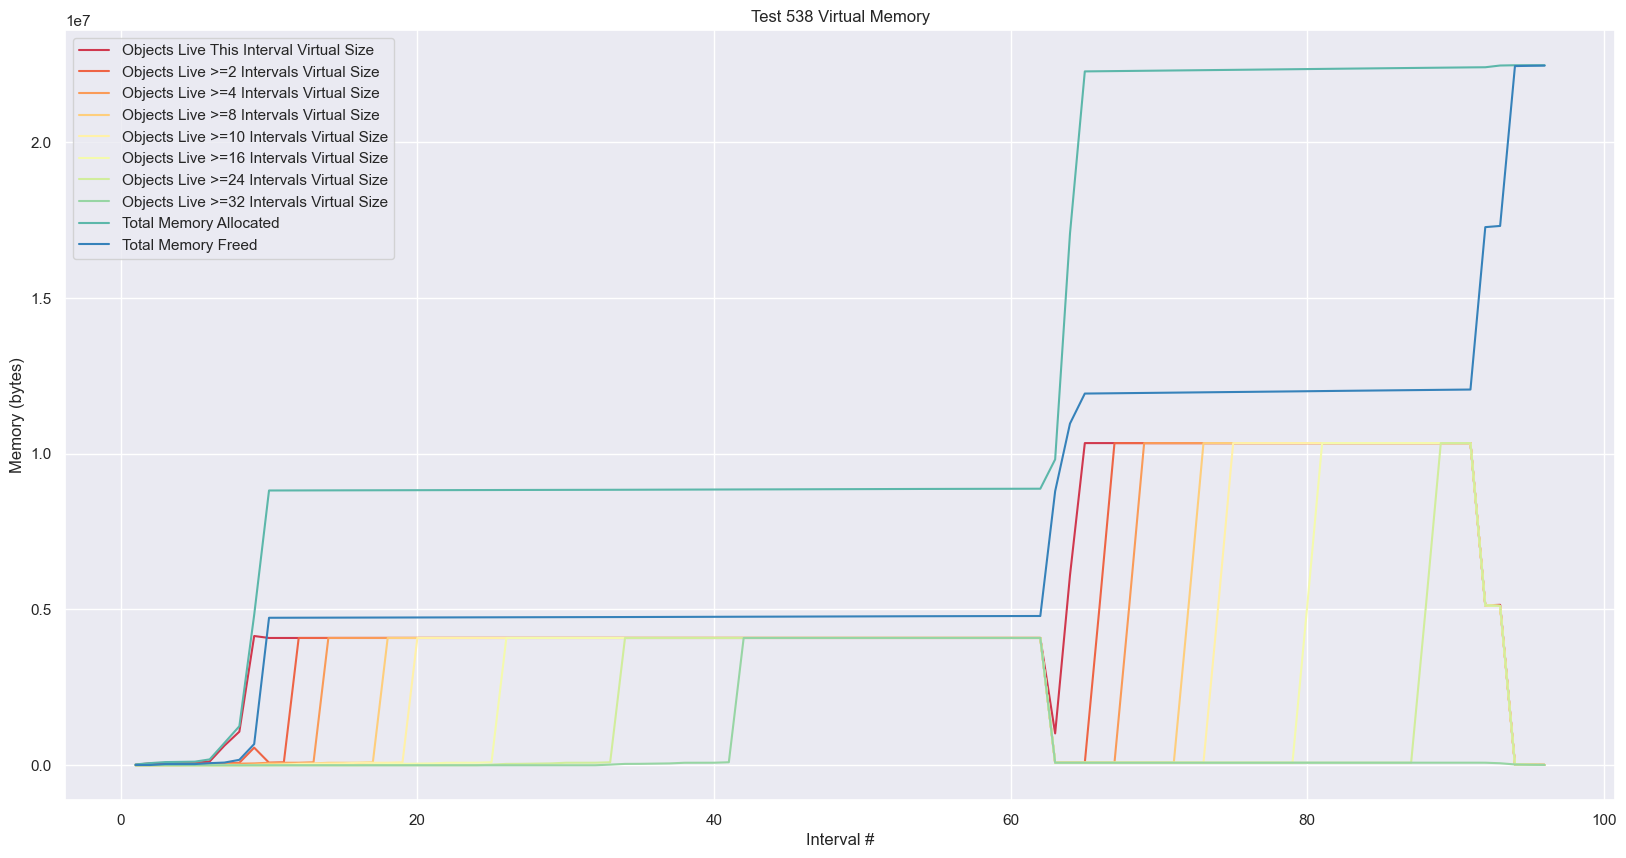

No access pattern data for test 538


In [3]:
# Graph the following columns as lines for each test:
# Total Memory Allocated
# Total Memory Freed
# Memory Allocated Since Last Interval
# Memory Freed Since Last Interval
# Objects Live This Interval Physical Size
# Objects Live >=2 Intervals Physical Size
# Objects Live >=4 Intervals Physical Size
# Objects Live >=8 Intervals Physical Size
# Objects Live >=10 Intervals Physical Size
# Objects Live >=16 Intervals Physical Size
# Objects Live >=24 Intervals Physical Size
# Objects Live >=32 Intervals Physical Size
# Objects Live This Interval Virtual Size
# Objects Live >=2 Intervals Virtual Size
# Objects Live >=4 Intervals Virtual Size
# Objects Live >=8 Intervals Virtual Size
# Objects Live >=10 Intervals Virtual Size
# Objects Live >=16 Intervals Virtual Size
# Objects Live >=24 Intervals Virtual Size
# Objects Live >=32 Intervals Virtual Size


# Get the tests from the data
tests = list(all_data.keys())

# Iterate over the tests and graph the results
for test_number in tests:
    # Get the data for the test
    test_data = all_data[test_number]
    
    # Graph the data
    # x-axis is the "Interval #" column
    plt.figure(figsize=(20, 10))
    
    # Graph with SNS
    sns.set_theme()
    # Set the colors
    # sns.set_palette("husl")
    colors = sns.color_palette("cubehelix", 8)
    # sns.lineplot(data=test_data, x="Interval #", y="Total Memory Allocated", label="Total Memory Allocated")
    # sns.lineplot(data=test_data, x="Interval #", y="Total Memory Freed", label="Total Memory Freed")
    # sns.lineplot(data=test_data, x="Interval #", y="Memory Allocated Since Last Interval", label="Memory Allocated Since Last Interval")
    # sns.lineplot(data=test_data, x="Interval #", y="Memory Freed Since Last Interval", label="Memory Freed Since Last Interval")
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live This Interval Physical Size", label="Objects Live This Interval Physical Size", color=colors[0])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=2 Intervals Physical Size", label="Objects Live >=2 Intervals Physical Size", color=colors[1])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=4 Intervals Physical Size", label="Objects Live >=4 Intervals Physical Size", color=colors[2])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=8 Intervals Physical Size", label="Objects Live >=8 Intervals Physical Size", color=colors[3])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=10 Intervals Physical Size", label="Objects Live >=10 Intervals Physical Size", color=colors[4])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=16 Intervals Physical Size", label="Objects Live >=16 Intervals Physical Size", color=colors[5])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=24 Intervals Physical Size", label="Objects Live >=24 Intervals Physical Size", color=colors[6])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=32 Intervals Physical Size", label="Objects Live >=32 Intervals Physical Size", color=colors[7])
    
    plt.title("Test " + str(test_number) + " Physical Memory")
    
    plt.xlabel("Interval #")
    plt.ylabel("Memory (bytes)")
    
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20, 10))
    colors = sns.color_palette("Spectral", 10)
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live This Interval Virtual Size", label="Objects Live This Interval Virtual Size", color=colors[0])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=2 Intervals Virtual Size", label="Objects Live >=2 Intervals Virtual Size", color=colors[1])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=4 Intervals Virtual Size", label="Objects Live >=4 Intervals Virtual Size", color=colors[2])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=8 Intervals Virtual Size", label="Objects Live >=8 Intervals Virtual Size", color=colors[3])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=10 Intervals Virtual Size", label="Objects Live >=10 Intervals Virtual Size", color=colors[4])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=16 Intervals Virtual Size", label="Objects Live >=16 Intervals Virtual Size", color=colors[5])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=24 Intervals Virtual Size", label="Objects Live >=24 Intervals Virtual Size", color=colors[6])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=32 Intervals Virtual Size", label="Objects Live >=32 Intervals Virtual Size", color=colors[7])
    sns.lineplot(data=test_data, x="Interval #", y="Total Memory Allocated", label="Total Memory Allocated", color=colors[8])
    sns.lineplot(data=test_data, x="Interval #", y="Total Memory Freed", label="Total Memory Freed", color=colors[9])
    
    plt.title("Test " + str(test_number) + " Virtual Memory")
    plt.xlabel("Interval #")
    plt.ylabel("Memory (bytes)")
    
    plt.legend()
    plt.show()
    
    if not 'Objects Live This Interval Physical Size (Read-Only)' in test_data.columns:
        print("No access pattern data for test " + str(test_number))
        continue
    
    # Now do the same thing, but with the read-only and write-only data
    # Graph the data
    # x-axis is the "Interval #" column
    plt.figure(figsize=(20, 10))
    # sns.lineplot(data=test_data, x="Interval #", y="Total Memory Allocated", label="Total Memory Allocated")
    # sns.lineplot(data=test_data, x="Interval #", y="Total Memory Freed", label="Total Memory Freed")
    # sns.set_palette(sns.color_palette("Blues", 8))
    # colors = sns.color_palette("Blues", 8)
    colors = sns.color_palette("crest", 8)
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live This Interval Physical Size (Read-Only)", label="Objects Live This Interval Physical Size (Read-Only)", color=colors[0])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=2 Intervals Physical Size (Read-Only)", label="Objects Live >=2 Intervals Physical Size (Read-Only)", color=colors[1])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=4 Intervals Physical Size (Read-Only)", label="Objects Live >=4 Intervals Physical Size (Read-Only)", color=colors[2])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=8 Intervals Physical Size (Read-Only)", label="Objects Live >=8 Intervals Physical Size (Read-Only)", color=colors[3])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=10 Intervals Physical Size (Read-Only)", label="Objects Live >=10 Intervals Physical Size (Read-Only)", color=colors[4])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=16 Intervals Physical Size (Read-Only)", label="Objects Live >=16 Intervals Physical Size (Read-Only)", color=colors[5])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=24 Intervals Physical Size (Read-Only)", label="Objects Live >=24 Intervals Physical Size (Read-Only)", color=colors[6])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=32 Intervals Physical Size (Read-Only)", label="Objects Live >=32 Intervals Physical Size (Read-Only)", color=colors[7])
    # plt.title("Test " + str(test_number) + " Physical Memory (Read-Only)")
    # plt.xlabel("Interval #")
    # plt.ylabel("Memory (bytes)")
    # plt.legend()
    # plt.show()
    
    # plt.figure(figsize=(20, 10))
    # sns.set_palette(sns.color_palette("Reds", 8))
    colors = sns.color_palette("flare", 8)
    
    # sns.lineplot(data=test_data, x="Interval #", y="Total Memory Allocated", label="Total Memory Allocated")
    # sns.lineplot(data=test_data, x="Interval #", y="Total Memory Freed", label="Total Memory Freed")
    # Show reddish colors for hot
    # sns.set_palette("Reds")
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live This Interval Physical Size (Written)", label="Objects Live This Interval Physical Size (Written)", color=colors[0])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=2 Intervals Physical Size (Written)", label="Objects Live >=2 Intervals Physical Size (Written)", color=colors[1])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=4 Intervals Physical Size (Written)", label="Objects Live >=4 Intervals Physical Size (Written)", color=colors[2])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=8 Intervals Physical Size (Written)", label="Objects Live >=8 Intervals Physical Size (Written)", color=colors[3])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=10 Intervals Physical Size (Written)", label="Objects Live >=10 Intervals Physical Size (Written)", color=colors[4])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=16 Intervals Physical Size (Written)", label="Objects Live >=16 Intervals Physical Size (Written)", color=colors[5])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=24 Intervals Physical Size (Written)", label="Objects Live >=24 Intervals Physical Size (Written)", color=colors[6])
    sns.lineplot(data=test_data, x="Interval #", y="Objects Live >=32 Intervals Physical Size (Written)", label="Objects Live >=32 Intervals Physical Size (Written)", color=colors[7])
    
    plt.title("Test " + str(test_number) + " Physical Memory (Written/Read-Only)")
    plt.xlabel("Interval #")
    plt.ylabel("Memory (bytes)")
    
    plt.legend()
    plt.show()
    
    